# Scatter Plot of Maximum Temperature v/s Maximum-Minimum Temperature

#######PYTHON CODE FOR IMD PREPARED BY LEKSHMI S#############

########## https://doi.org/10.5281/zenodo.5674826 ############

In [1]:
###############Reading IMD binary (GRD) data for Maximum temperature###############

import numpy as np
import glob
import matplotlib.pyplot as plt
import datetime as dt

filename1='/mnt/d/DATA/IMD_MaxTemp/Maxtemp_MaxT_20*.GRD'
filename2='/mnt/d/DATA/IMD_MinTemp/Mintemp_MinT_20*.GRD'

In [2]:
###############Have to set according to data format##############################

nlat=31			# Obtained from the ctl file
nlon=31
nyear=21
ndjf_years=20
jjas_years=21
mam_years=21
years=np.arange(2000,2021,1)
lons=np.arange(67.5,98.5,1)	# Define latitude and longitude as obtained from ctl file
#print(lons)
lats=np.arange(7.5,38.5,1)
#print(lats)
latbounds = [ 18.0 , 29.0 ]	#Lat-lon bound for Heat Wave (MZI)
lonbounds = [ 65.0 , 89.0 ] 	# degrees east 

In [3]:
##############Fixed for the looping##############################################

npos=59
ndjf_days=120
jjas_days=121
mam_days=91
lp=0
nlp=0
lpdays=366
nlpdays=365
fill=99.9
a=0

MaxTemp=np.full([nyear,lpdays,nlat,nlon],fill,order='C')# Create an empty 4d array to store data
MinTemp=np.full([nyear,lpdays,nlat,nlon],fill,order='C')# Create an empty 4d array to store data
na=np.full([nlat,nlon],fill,order='C')	# Array to be given for leap year day in non-leap years

In [4]:
#######################Looping for creating time series maxtemp data#######################

for files in glob.glob(filename1):
	f=open(files,'rb')
	maxdata=np.fromfile(f,dtype="float32",count=-1)	#  Reading the file into a 1D array
	y=years[a]
	if (y%4==0):
		maxtemp=np.reshape(maxdata,(lpdays,nlat,nlon),order='C')#Reading variable in required shape
		MaxTemp[a,:,:,:]=maxtemp	# Storing variable in the empty array
	else:
		maxtemp=np.reshape(maxdata,(nlpdays,nlat,nlon),order='C')
		maxtemp=np.insert(maxtemp,npos,na,axis=0)
		MaxTemp[a,:,:,:]=maxtemp	# Storing variable in the empty array
	a=a+1
#print(MaxTemp.shape)
del files
del f

In [5]:
#######################Looping for creating time series mintemp data#######################
a=0
for files in glob.glob(filename2):
	f=open(files,'rb')
	mindata=np.fromfile(f,dtype="float32",count=-1)	#  Reading the file into a 1D array
	y=years[a]
	if (y%4==0):
		mintemp=np.reshape(mindata,(lpdays,nlat,nlon),order='C')#Reading variable in required shape
		MinTemp[a,:,:,:]=mintemp	# Storing variable in the empty array
	else:
		mintemp=np.reshape(mindata,(nlpdays,nlat,nlon),order='C')
		mintemp=np.insert(mintemp,npos,na,axis=0)
		MinTemp[a,:,:,:]=mintemp	# Storing variable in the empty array
	a=a+1
	del mintemp
#print(MinTemp.shape)
del files
del f


In [6]:
##############Extract season data for each year####################################

latselect=np.logical_and(lats>=latbounds[0],lats<=latbounds[1])
lonselect=np.logical_and(lons>=lonbounds[0],lons<=lonbounds[1])

#########Maximum Temperature
maxtemp_jjas=MaxTemp[:,152:273,:,:][:,:,latselect,:][:,:,:,lonselect]
maxtemp_mam=MaxTemp[:,60:151,:,:][:,:,latselect,:][:,:,:,lonselect]

maxtemp_ndjf=np.full([nyear-1,ndjf_days,maxtemp_jjas.shape[2],maxtemp_jjas.shape[3]],fill,order='C')
maxtemp_nd=MaxTemp[:,305:365,:,:][:,:,latselect,:][:,:,:,lonselect]
maxtemp_jf=MaxTemp[:,0:59,:,:][:,:,latselect,:][:,:,:,lonselect]
maxtemp_ndjf[:,0:60,:,:]=maxtemp_nd[:nyear-1,:,:,:]
for i in range(1,nyear-1):
    maxtemp_ndjf[i,61:,:,:]=maxtemp_jf[i+1,:,:,:]

In [7]:
#######Minimum Temperature
mintemp_ndjf=np.full([nyear-1,ndjf_days,maxtemp_jjas.shape[2],maxtemp_jjas.shape[3]],fill,order='C')
mintemp_jjas=MinTemp[:,152:273,:,:][:,:,latselect,:][:,:,:,lonselect]
mintemp_mam=MinTemp[:,60:151,:,:][:,:,latselect,:][:,:,:,lonselect]

mintemp_nd=MinTemp[:,305:365,:,:][:,:,latselect,:][:,:,:,lonselect]
mintemp_jf=MinTemp[:,0:59,:,:][:,:,latselect,:][:,:,:,lonselect]
mintemp_ndjf[:,0:60,:,:]=mintemp_nd[:nyear-1,:,:,:]
for i in range(1,nyear-1):
    mintemp_ndjf[i,61:,:,:]=mintemp_jf[i+1,:,:,:]


In [8]:
##############Mask the fill values in data#######################################

MaxTemp_jjas_mask=np.ma.masked_where(maxtemp_jjas>99.0, maxtemp_jjas)
MaxTemp_ndjf_mask=np.ma.masked_where(maxtemp_ndjf>99.0, maxtemp_ndjf)
MaxTemp_mam_mask=np.ma.masked_where(maxtemp_mam>99.0, maxtemp_mam)

MinTemp_jjas_mask=np.ma.masked_where(mintemp_jjas>99.0, mintemp_jjas)
MinTemp_ndjf_mask=np.ma.masked_where(mintemp_ndjf>99.0, mintemp_ndjf)
MinTemp_mam_mask=np.ma.masked_where(mintemp_mam>99.0, mintemp_mam)

In [9]:
#############Reshape into time, lat and lon######################################

tmax_jjas=np.reshape(MaxTemp_jjas_mask,(jjas_years*jjas_days,maxtemp_jjas.shape[2],maxtemp_jjas.shape[3]),order='C')
tmax_ndjf=np.reshape(MaxTemp_ndjf_mask,(ndjf_years*ndjf_days,maxtemp_jjas.shape[2],maxtemp_jjas.shape[3]),order='C')
tmax_mam=np.reshape(MaxTemp_mam_mask,(mam_years*mam_days,maxtemp_jjas.shape[2],maxtemp_jjas.shape[3]),order='C')

tmin_jjas=np.reshape(MinTemp_jjas_mask,(jjas_years*jjas_days,maxtemp_jjas.shape[2],maxtemp_jjas.shape[3]),order='C')
tmin_ndjf=np.reshape(MinTemp_ndjf_mask,(ndjf_years*ndjf_days,maxtemp_jjas.shape[2],maxtemp_jjas.shape[3]),order='C')
tmin_mam=np.reshape(MinTemp_mam_mask,(mam_years*mam_days,maxtemp_jjas.shape[2],maxtemp_jjas.shape[3]),order='C')

In [10]:
#######################Calculate difference of max and min temp################

diff_jjas=tmax_jjas-tmin_jjas
diff_ndjf=tmax_ndjf-tmin_ndjf
diff_mam=tmax_mam-tmin_mam

Text(0.5, 0, 'Maximum- Minimum Temperature (degC)')

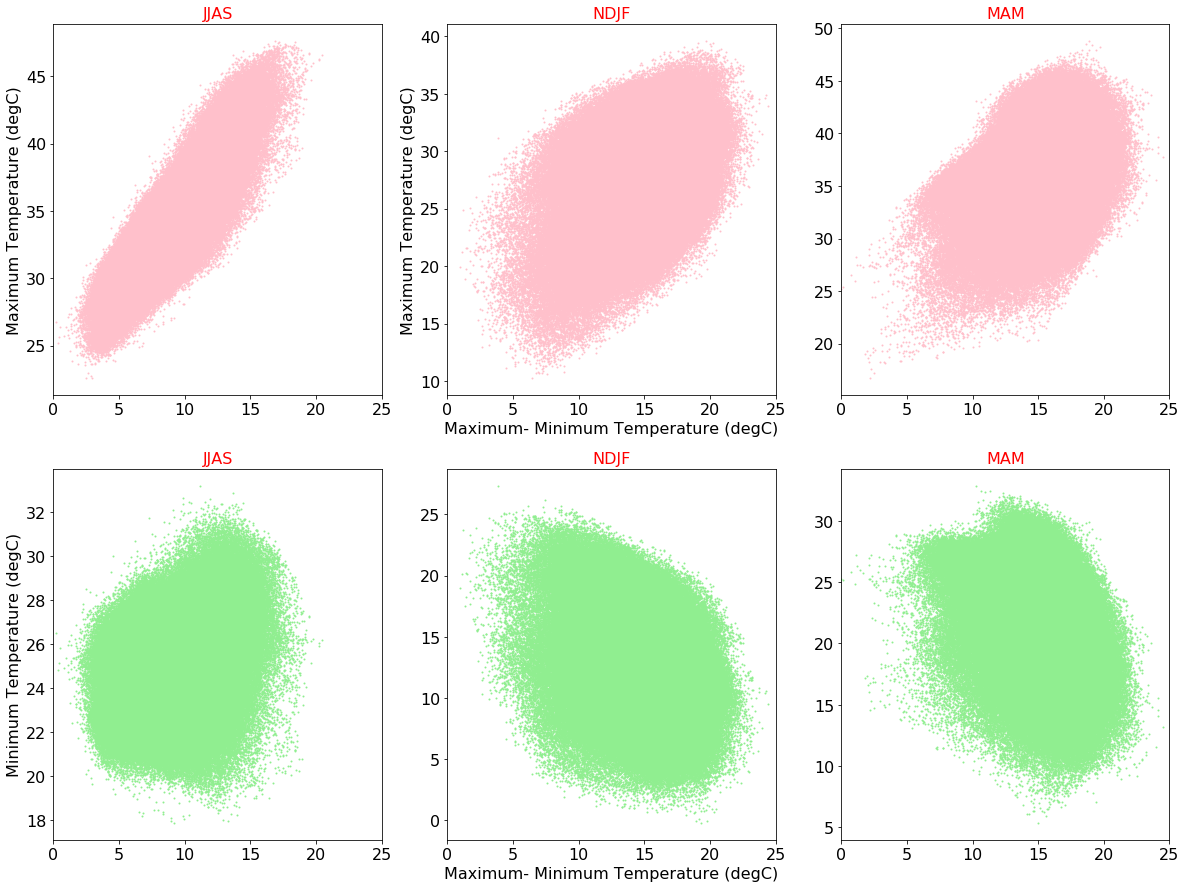

In [11]:
####################Scatter Plot for JJAS and NDJF##############################

fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2,3,figsize=(20,15))
ax1.scatter(diff_jjas,tmax_jjas,s=1,c='pink')
ax1.set_title('JJAS',color='r',fontsize=16)

ax2.scatter(diff_ndjf,tmax_ndjf,s=1,c='pink')
ax2.set_title('NDJF',color='r',fontsize=16)

ax3.scatter(diff_mam,tmax_mam,s=1,c='pink')
ax3.set_title('MAM',color='r',fontsize=16)

ax4.scatter(diff_jjas,tmin_jjas,s=1,c='lightgreen')
ax4.set_title('JJAS',color='r',fontsize=16)

ax5.scatter(diff_ndjf,tmin_ndjf,s=1,c='lightgreen')
ax5.set_title('NDJF',color='r',fontsize=16)

ax6.scatter(diff_mam,tmin_mam,s=1,c='lightgreen')
ax6.set_title('MAM',color='r',fontsize=16)

ax1.set_xlim(0.0,25.0)
ax2.set_xlim(0.0,25.0)
ax3.set_xlim(0.0,25.0)
ax4.set_xlim(0.0,25.0)
ax5.set_xlim(0.0,25.0)
ax6.set_xlim(0.0,25.0)

ax1.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)
ax3.tick_params(axis='both', which='major', labelsize=16)
ax4.tick_params(axis='both', which='major', labelsize=16)
ax5.tick_params(axis='both', which='major', labelsize=16)
ax6.tick_params(axis='both', which='major', labelsize=16)


ax1.set_ylabel("Maximum Temperature (degC)",fontsize=16)
ax2.set_xlabel("Maximum- Minimum Temperature (degC)",fontsize=16)
ax2.set_ylabel("Maximum Temperature (degC)",fontsize=16)
ax4.set_ylabel("Minimum Temperature (degC)",fontsize=16)
ax5.set_xlabel("Maximum- Minimum Temperature (degC)",fontsize=16)
